In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 导入训练集数据
#monster = pd.read_csv("http://jizhi-10061919.file.myqcloud.com/kaggle_sklearn/monster_train.csv")
monster = pd.read_csv('train.csv')
# 输出统计信息
print("-------------------monster.describe------------------------------------")
print(monster.describe())
print("-------------------monster.info--------------------------------")
print(monster.info())
print("-------------------monster.head----------------------------------")
print(monster.head())

-------------------monster.describe------------------------------------
               id  bone_length  rotting_flesh  hair_length    has_soul
count  371.000000   371.000000     371.000000   371.000000  371.000000
mean   443.676550     0.434160       0.506848     0.529114    0.471392
std    263.222489     0.132833       0.146358     0.169902    0.176129
min      0.000000     0.061032       0.095687     0.134600    0.009402
25%    205.500000     0.340006       0.414812     0.407428    0.348002
50%    458.000000     0.434891       0.501552     0.538642    0.466372
75%    678.500000     0.517223       0.603977     0.647244    0.600610
max    897.000000     0.817001       0.932466     1.000000    0.935721
-------------------monster.info--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_leng

In [20]:
# color特征数值化
def color_code(df):
    # 提取所有存在的颜色，组成一个列表
    monster_color = df["color"].unique()

    # 循环将color都替换为其在颜色列表中的索引（整数）
    for i_color, m_color in enumerate(monster_color):
        df.loc[df["color"] == m_color, "color"] = i_color


# 请完成下列程序，对type标签做同样的数值化处理
def type_code(df):
    # 提取所有存在的类型，组成一个列表
    monster_type = df["type"].unique()

    # 循环将type都替换为其在类型列表中的索引（整数）
    for i_type, m_type in enumerate(monster_type):
        df.loc[df["type"] == m_type, "type"] = i_type



    # 将拟合标签再转换为浮点数
    df["type"] = df["type"].apply(pd.to_numeric)

# 传入monster函数，运行两个函数
color_code(monster)
type_code(monster)

# 查看数值化后的数据集
#print(monster.head())
#print(monster)

In [21]:
monster_color = monster["color"].unique()
print(monster_color)

[0 1 2 3 4 5]


SelectKBest(k='all', score_func=<function f_classif at 0x7fa2493bb5f0>)
[ 25.28055469  15.99909385  49.56827889  44.19056558   0.5334934 ]


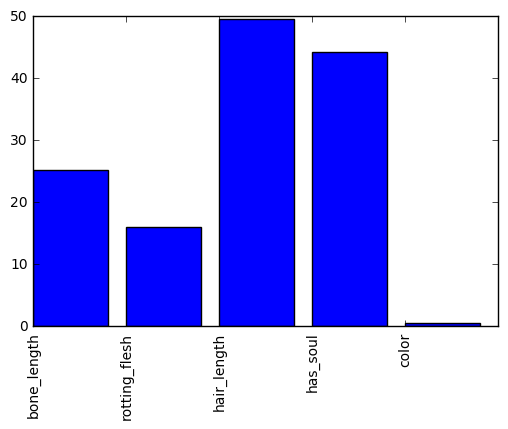

In [27]:
# 导入SelectKBest, f_classif模块
from sklearn.feature_selection import SelectKBest, f_classif

# 定义待核算的特征，直接排除掉'id'
predictors = ["bone_length", "rotting_flesh", "hair_length", "has_soul", "color"]

# 建立选择器对象，用predictors所含特征进行拟合
selector = SelectKBest(f_classif, k='all')

selector.fit(monster[predictors], monster["type"])

# 输出每个特征所得的分数
scores = -np.log10(selector.pvalues_)
print(scores)
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [7]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
# 修改predictors变量的定义，去掉"color"
predictors = ["bone_length", "rotting_flesh", "hair_length", "has_soul"]
# 创建分类器对象，n_estimators=10, min_samples_split=2, min_samples_leaf=1
#clf = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=0)
#clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
# 创建交叉验证对象，使n_folds=3
kf = cross_validation.KFold(n=monster.shape[0], n_folds=3, random_state=0)

# 计算分类器的交叉验证分数
scores = cross_validation.cross_val_score(clf, monster[predictors], monster["type"], cv=kf)


#scores = cross_validation.cross_val_score(clf, raw_data, raw_target, cv=5, score_func=None)
#clf:表示不同的分类器，可以是任何的分类器。比如支持向量机分类器。clf = svm.SVC(kernel=’linear’, C=1)； 
#raw_data：原始数据；
#raw_target:原始类别标号；
#cv：代表的就是不同的cross validation的方法
#cv是一个int数字,则默认使用KFold或者StratifiedKFold交叉，若指定了类别标签则使用的是StratifiedKFold
#cross_val_score:这个函数的返回值就是对于每次不同的的划分raw_data时，在test_data上得到的分类的准确率
#准确率的算法可以通过score_func参数指定，如果不指定的话，是用clf默认自带的准确率算法。
print(scores)
print(scores.mean())

[ 0.72580645  0.7016129   0.69105691]
0.706158755136


In [24]:
# 导入测试集文件
monster_test = pd.read_csv('test.csv')

# 特征数值化，注意测试集不含'type'列，所以只对'color'执行即可
color_code(monster_test)

# 训练分类器
clf.fit(monster[predictors], monster["type"])

# 对测试集做预测
predictions = clf.predict(monster_test[predictors])

# 生成包含结果的对象
submission = pd.DataFrame({
    "id": monster_test["id"],
    "type": predictions
})

# 在计算过程中我们将'type'做了数值化，所以需要反向还原为字符
def type_decode(df):
    df.loc[df["type"] == 0, "type"] = "Ghoul"
    df.loc[df["type"] == 1, "type"] = "Goblin"
    df.loc[df["type"] == 2, "type"] = "Ghost"

type_decode(submission)
submission.to_csv("result.csv", index=False)

f = open("result.csv")
print(f.read())

id,type
3,Ghoul
6,Goblin
9,Ghoul
10,Ghost
13,Ghost
14,Ghost
15,Ghoul
16,Goblin
17,Goblin
18,Goblin
20,Ghost
21,Ghoul
24,Ghoul
26,Ghost
33,Ghoul
38,Ghost
40,Goblin
41,Ghost
42,Ghost
43,Ghoul
44,Ghoul
46,Goblin
48,Ghoul
49,Goblin
50,Ghoul
51,Goblin
52,Ghoul
53,Goblin
55,Ghoul
57,Ghoul
59,Goblin
60,Ghoul
61,Ghoul
63,Goblin
64,Goblin
65,Ghoul
66,Ghost
67,Goblin
68,Ghost
74,Ghoul
76,Goblin
77,Goblin
78,Goblin
81,Goblin
83,Goblin
87,Ghoul
92,Ghoul
97,Ghoul
98,Ghoul
99,Ghost
100,Goblin
101,Goblin
102,Ghost
104,Goblin
105,Goblin
106,Ghost
108,Goblin
110,Goblin
112,Ghoul
114,Ghost
116,Ghoul
117,Ghoul
120,Ghost
121,Goblin
122,Goblin
123,Ghoul
124,Ghoul
126,Ghoul
127,Ghost
132,Ghoul
134,Ghost
135,Ghost
136,Goblin
137,Ghoul
138,Goblin
139,Ghoul
140,Goblin
144,Goblin
145,Ghost
146,Goblin
147,Ghost
148,Goblin
149,Ghoul
150,Ghoul
151,Ghost
152,Ghost
153,Ghost
154,Goblin
156,Ghost
158,Ghost
160,Ghost
164,Ghost
166,Goblin
167,Ghost
169,Ghost
171,Ghost
173,Goblin
178,Goblin
179,Goblin
181,Goblin
182,Gho